<a href="https://colab.research.google.com/github/aditichhteri/Reciperadar/blob/main/Median_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:


# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Select one image for demonstration
image = test_images[0]

In [ ]:

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    salt_mask = np.random.choice([0, 1, 2], size=image.shape, p=[salt_prob, pepper_prob, 1 - salt_prob - pepper_prob])
    noisy_image[salt_mask == 0] = 255  # salt
    noisy_image[salt_mask == 1] = 0    # pepper
    return noisy_image

ConcretizationTypeError: Abstract tracer value encountered where concrete value is expected: traced array with shape int32[]
pad_width argument of jnp.pad
The error occurred while tracing the function median_filter_jax at /tmp/ipython-input-2829988941.py:17 for jit. This concrete value was not available in Python because it depends on the value of the argument kernel_size.

See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.ConcretizationTypeError

In [ ]:
def apply_median_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            kernel = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.median(kernel)
    return filtered_image

11490434/11490434 [==============================] - 0s 0us/step


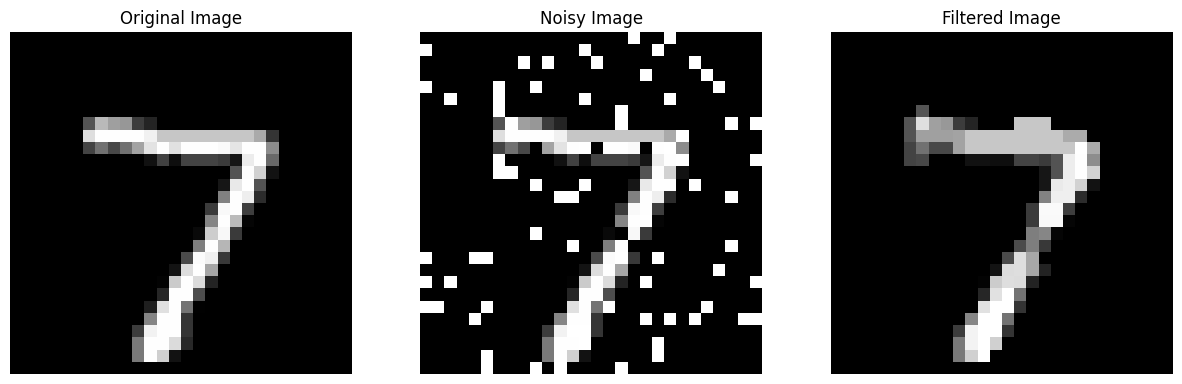

In [ ]:





# Add salt-and-pepper noise
salt_prob = 0.1
pepper_prob = 0.1
noisy_image = add_salt_and_pepper_noise(image, salt_prob, pepper_prob)

# Apply median filter
kernel_size = 3
filtered_image = apply_median_filter(noisy_image, kernel_size)

# Plot original, noisy, and filtered images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].axis('off')

axes[2].imshow(filtered_image, cmap='gray')
axes[2].set_title('Filtered Image')
axes[2].axis('off')

plt.show()
